## Titanic with Apriori

Processing 40 combinations | Sampling itemset size 54
                             antecedents     consequents  antecedent support  \
65  (Survived_No, Sex_Female, Age_Child)     (Class_3rd)            0.007724   
22                (Class_2nd, Age_Child)  (Survived_Yes)            0.010904   
57    (Sex_Male, Survived_No, Class_2nd)     (Age_Adult)            0.069968   
70    (Sex_Male, Survived_No, Age_Child)     (Class_3rd)            0.015902   
56    (Sex_Female, Class_2nd, Age_Child)  (Survived_Yes)            0.005906   
..                                   ...             ...                 ...   
62  (Class_3rd, Survived_No, Sex_Female)     (Age_Adult)            0.048160   
67      (Class_3rd, Age_Adult, Sex_Male)   (Survived_No)            0.209905   
26                 (Class_3rd, Sex_Male)   (Survived_No)            0.231713   
63  (Survived_No, Age_Adult, Sex_Female)     (Class_3rd)            0.049523   
66   (Class_3rd, Survived_No, Age_Adult)      (Sex_Male)          

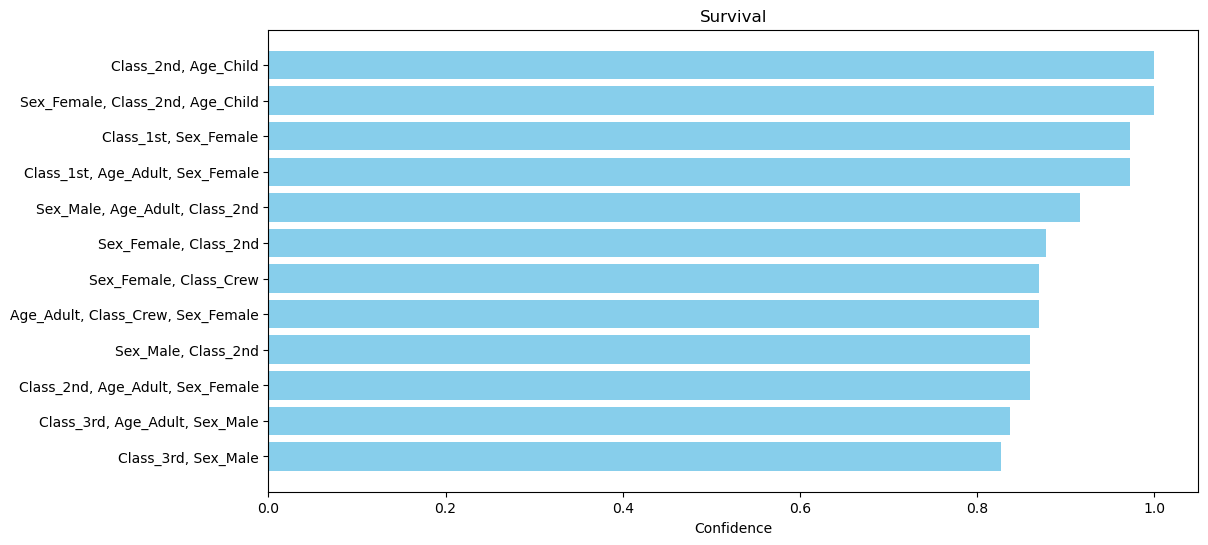

In [23]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')
df = df.drop(df.columns[0], axis=1)

data = pd.get_dummies(df, columns=['Class', 'Sex', 'Age', 'Survived'])

#print(data.head())

freq = apriori(data, min_support=0.005, use_colnames=True, verbose=1)

#print(freq.head(20))

rules = association_rules(freq, metric="confidence", min_threshold=0.8)
rules = rules.sort_values('confidence', ascending=False)
print(rules)

# Filtrowanie reguł dotyczących przeżywalności
survival_rules = rules[rules['consequents'].apply(lambda x: ('Survived_Yes' in str(x) or 'Survived_No' in str(x)) and 'Age_Adult' not in str(x))]

# Sortowanie reguł wg ufności
survival_rules = survival_rules.sort_values('confidence', ascending=False)

# Wyświetlenie najciekawszych reguł
print(survival_rules)

# Utworzenie wykresu słupkowego
plt.figure(figsize=(12, 6))
plt.barh(range(len(survival_rules)), survival_rules['confidence'], color='skyblue')
plt.yticks(range(len(survival_rules)), survival_rules['antecedents'].apply(lambda x: ', '.join(list(x))))
plt.xlabel('Confidence')
plt.title('Survival')
plt.gca().invert_yaxis()  # Odwróć oś Y, aby najważniejsze reguły były na górze
plt.show()
